### 自展检验
Bootstrap又称自展法，是用小样本估计总体值的一种非参数方法，在进化和生态学研究中应用十分广泛。例如进化树分化节点的自展支持率等。

Bootstrap的思想，是生成一系列bootstrap伪样本，每个样本是初始数据有放回抽样。通过对伪样本的计算，获得统计量的分布。例如，要进行1000次bootstrap，求平均值的置信区间，可以对每个伪样本计算平均值。这样就获得了1000个平均值。对着1000个平均值的分位数进行计算， 即可获得置信区间。已经证明，在初始样本足够大的情况下，bootstrap抽样能够无偏得接近总体的分布。

下面是一个实例：

例如，假设有一批产品，随机抽出30个，使用寿命（天数）如下，试用bootstrap的方法估计这批产品寿命95%的置信区间。

In [7]:
dat <- c(119,120,131,209,210,337,332,287,146,1,
       29,232,169,208,253,142,105,419,179,
         324,287,115,132,308,356,286,221,204,
         105,45,245)

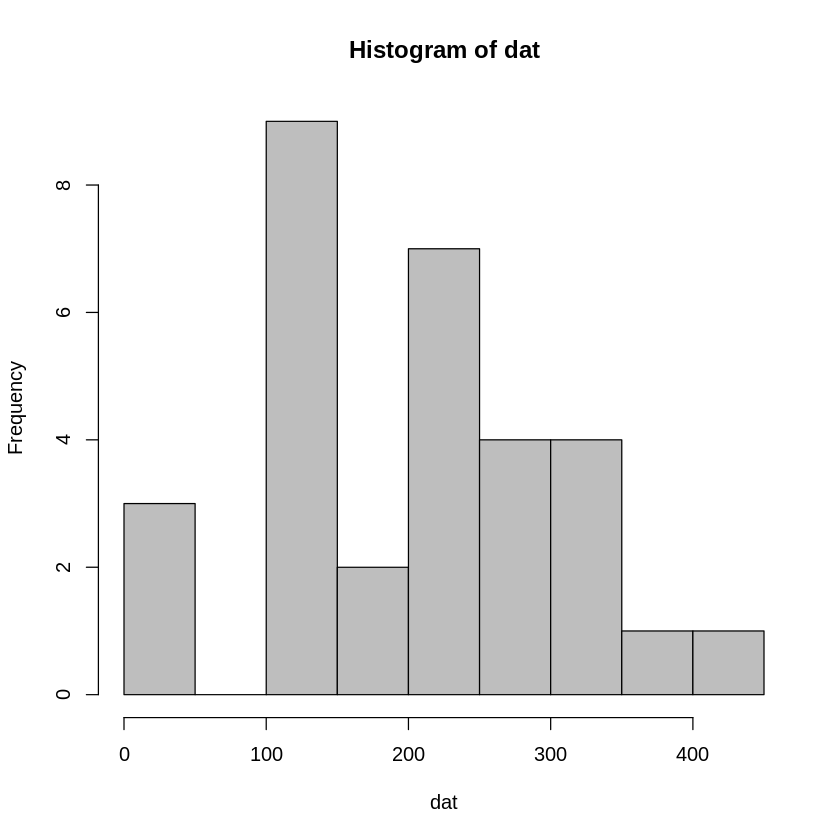

In [8]:
### 查看原始数据的频数直方图
hist(dat, col = "gray")

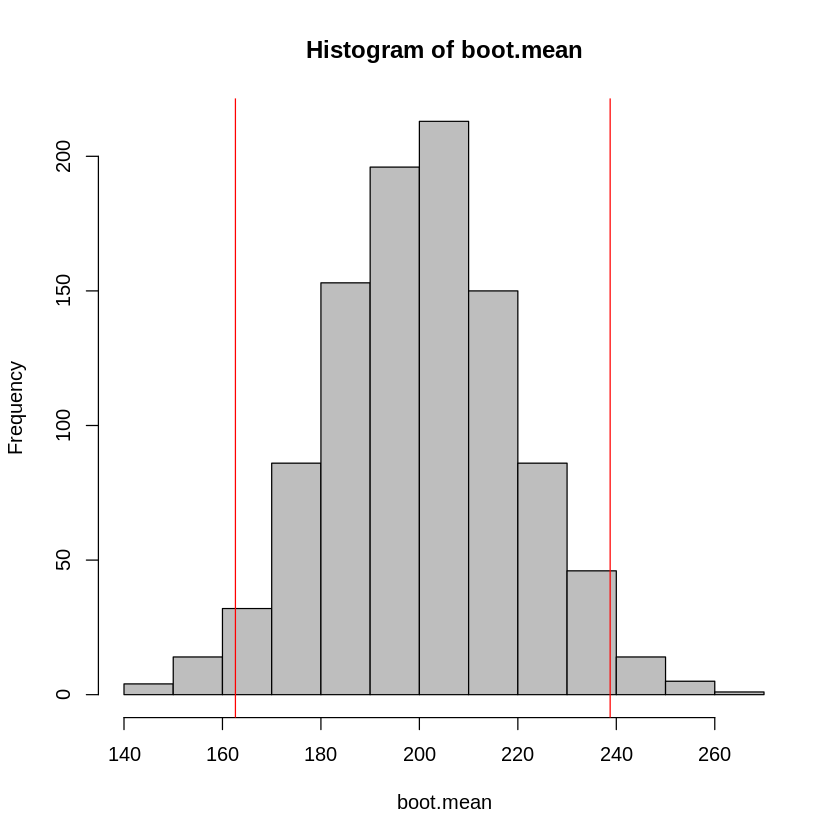

In [16]:
#生成一个存储器

boot.sample <- list()

## 循环1000次，有放回的抽样，每次生成的
## 新样本存储在boot.sample中
for(i in 1:1000){
     boot.sample[[i]] <- sample(dat,size = 30, replace = TRUE)
}

## 求每个样本的mean,结果为1000个bootstrap样本的mean
boot.mean <- unlist(lapply(boot.sample, mean))
## 频数直方图
hist(boot.mean, col = "gray")

# 对着1000个平均值的分位数进行计算， 即可获得置信区间
## 求95%的置信区间
CI95 <- quantile(boot.mean, probs = c(0.025, 0.975))

## 在频数直方图上加置信区间
abline(v = CI95, col = "red")

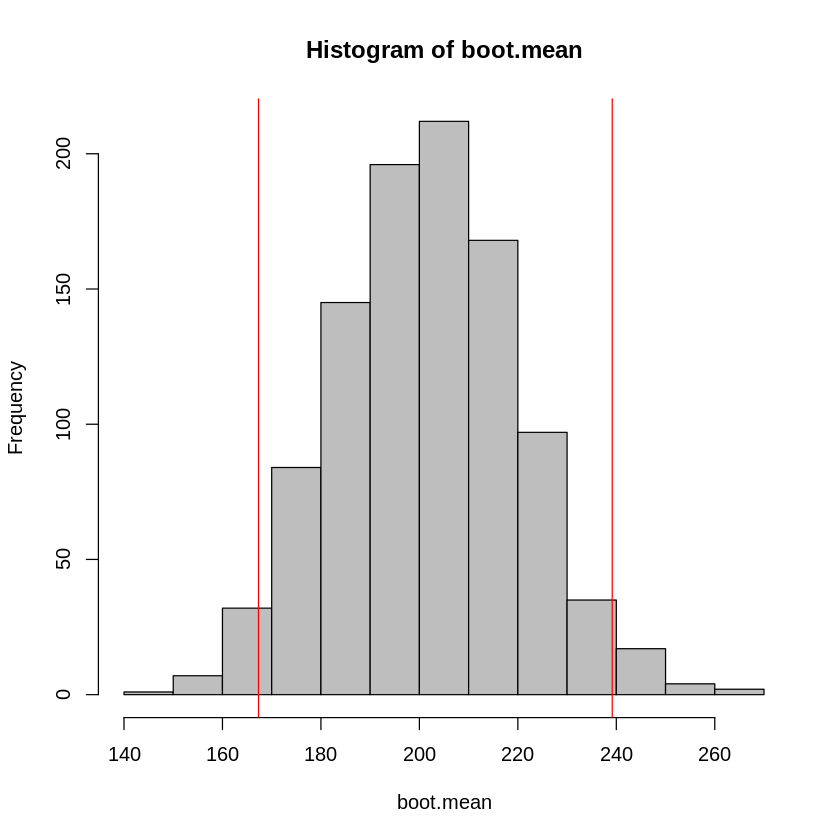

In [17]:
#生成一个存储器

boot.mean <- vector()

## 循环1000次，有放回的抽样，每次生成的
## 新样本存储在boot.sample中
for(i in 1:1000){
    x <- sample(dat,size = 30, replace = TRUE)
    boot.mean <- c(boot.mean,mean(x))
}

## 求每个样本的mean,结果为1000个bootstrap样本的mean
#boot.mean <- unlist(lapply(boot.sample, mean))
## 频数直方图
hist(boot.mean, col = "gray")

## 求95%的置信区间
CI95 <- quantile(boot.mean, probs = c(0.025, 0.975))

## 在频数直方图上加置信区间
abline(v = CI95, col = "red")

族群的平均值和方差



[1] 1.99862

[1] 3.9988

样本均值的平均值和方差



[1] 1.991265

[1] 0.03982034

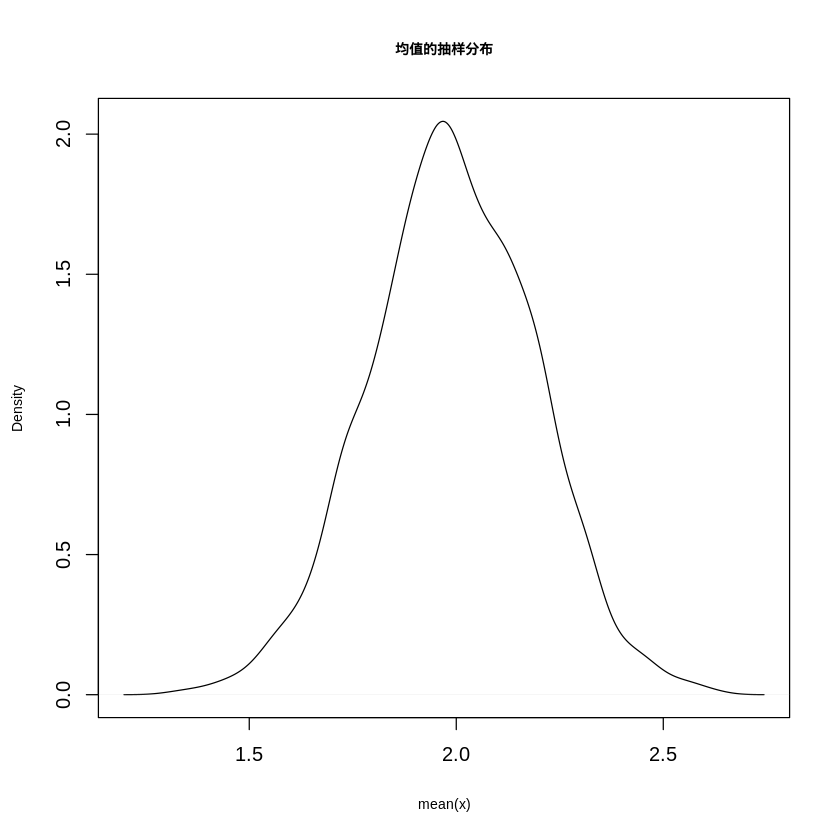

In [48]:
###############样本均值的分布
set.seed(12345)
Pop1<-rnorm(10000,mean=2,sd=2)   ###两总体方差相等
x_mean_distribution <- vector()
for(i in 1:2000){
    x<-sample(Pop1,size=100,replace=TRUE) # 从总体为100000种随机有放回抽100个样本
    x_mean_distribution <- c(x_mean_distribution, mean(x))
}
message("族群的平均值和方差")
mean(Pop1)
var(Pop1)
message("样本均值的平均值和方差")
mean(x_mean_distribution)
var(x_mean_distribution)
## 样本均值的概率密度分布
plot(density(x_mean_distribution),xlab="mean(x)",ylab="Density",main="均值的抽样分布",cex.main=0.7,cex.lab=0.7) 

[1] 1.99862

[1] 0.08306052

[1] 12.22511

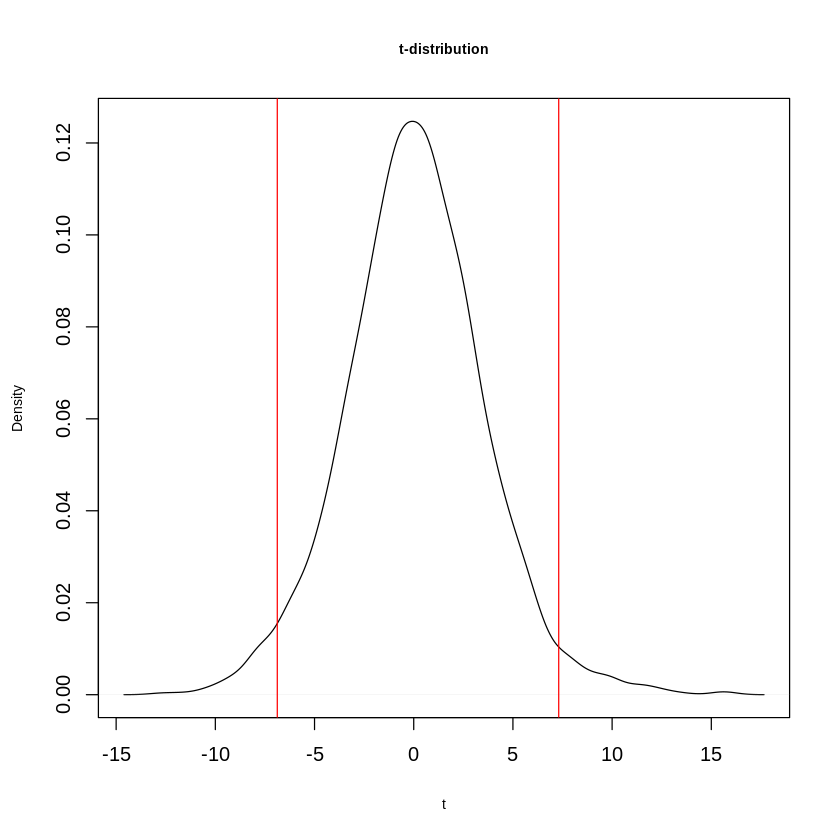

In [55]:
###############样本均值的分布
set.seed(12345)
Pop1<-rnorm(10000,mean=2,sd=2)   ###两总体方差相等
x_mean_distribution <- vector()
for(i in 1:2000){
    x<-sample(Pop1,size=10,replace=TRUE) # 从总体为100000种随机有放回抽100个样本
    x_mean_distribution <- c(x_mean_distribution, (mean(x)-mean(Pop1))/(sd(x)/sqrt(100)))
}

mean(Pop1)
mean(x_mean_distribution)
var(x_mean_distribution)
## 样本均值的概率密度分布
plot(density(x_mean_distribution),xlab="t",ylab="Density",main="t-distribution",cex.main=0.7,cex.lab=0.7) 
## 求95%的置信区间
CI95 <- quantile(x_mean_distribution, probs = c(0.025, 0.975))
## 在频数直方图上加置信区间
abline(v = CI95, col = "red")

## 尧敦方试验设计

In [24]:
library(agricolae)
trt <- c('A','B','C','D')  # 处理
outdesign <- design.youden(trt,3,serie = 2,seed=123)
class(outdesign)
outdesign$sketch

[1] "list"

C,A,D
D,B,C
A,D,B
B,C,A


In [38]:
res <- c(80,68,20,74,75,64,76,40,8,70,38,70)
youden.data <- cbind(outdesign$book,res=res)
#youden.data
aov.model <- aov(res~trt+row+col,data=youden.data)
summary(aov.model)
#anova.table(aov.model)
?aov

            Df Sum Sq Mean Sq F value Pr(>F)
trt          3 1220.9   407.0   1.391  0.396
row          3 1935.1   645.0   2.205  0.266
col          2 2397.2  1198.6   4.097  0.139
Residuals    3  877.8   292.6               

aov {stats},R Documentation
formula,A formula specifying the model.
data,"A data frame in which the variables specified in the formula will be found. If missing, the variables are searched for in the standard way."
projections,Logical flag: should the projections be returned?
qr,Logical flag: should the QR decomposition be returned?
contrasts,"A list of contrasts to be used for some of the factors in the formula. These are not used for any Error term, and supplying contrasts for factors only in the Error term will give a warning."
...,"Arguments to be passed to lm, such as subset or na.action. See ‘Details’ about weights."
